This summarises what is found in Lesson 1 of the Stats501 in Penn State University's Regression Methods Course

This lesson deals with Simple Linear Regression, and includes how to calulate the best fitting line (least square method)

https://newonlinecourses.science.psu.edu/stat501/node/250/

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy

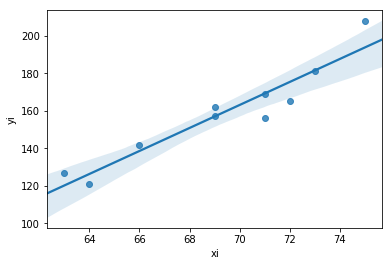

In [2]:
data = pd.read_csv("Weight to Height Data.csv")

meanx = data.xi.mean()
meany = data.yi.mean()

sns.regplot(data.xi, data.yi)

## Fitting SLR without stats packages

Given a dataset, how might we find a line that best cut across these points on the chart? What is the optimal way to draw this line? 

A line is essentially a linear formula of y = mx + c. However, since we are not doing a simple line graph, we replace m with b1 and c with b0 (betas). 

To find betas, we do the following: 

In [3]:
# b1 - the slope of the line, or also known as the co-efficient
b1 = sum((data.xi - meanx)*(data.yi - meany))/ sum((data.xi - meanx)**2)

# b0 - the intercept of the line
b0 = meany - b1*(meanx)

var2 = sum((data.yi - meany)**2)/(len(data) - 1)

modelresults = b1*data.xi + b0

#mse also known as residual error
mse = round(sum((data.yi - modelresults)**2)/(len(data) - 2), 2)

print ("Mean Squared Error:", mse)

Mean Squared Error: 74.67


## Find the R-Square value 

The correlation of determination, The R^2 value, essentially tells us by how much does the x explain the y. The closer to 1, the more x explains y. 

In [4]:
# regression sum of squares - how far the estimated sloped regression line (y-hat) is from the horizontal "no relationship line", the sample mean or meany
SSR = sum( (modelresults - meany)**2)

# error sum of squares - how much data points vary from the estimated regression line (y-hat)

SSE = sum( (data.yi - modelresults)**2) 

# "r^2 ×100 percent of the variation in y is reduced by taking into account predictor x"

#"r^2 ×100 percent of the variation in y is 'explained by' the variation in predictor x."

# total sum of squares - how much the data points vary from their mean
SSTO = sum( (data.yi - meany) **2)

# the co-efficient of determination, r-squared value
rsquare = SSR/SSTO

# alternative rsquare is also 1 - SSE/SSTO

rsquare = 1 - (SSE/SSTO)

# the higher the rsquare, the closer the model is to the actual datapoints.

In [40]:
print ("R-square: ", round(rsquare,3))

R-square:  0.897


## (Pearson's) Correlation Coefficient

In [27]:
# you can just root the R^2 and get it

r = abs(rsquare ** (1/2))
print (round(r,3))

# but r can also be found by using this:
r = (sum((data.xi - meanx)*(data.yi - meany)))/((sum((data.xi - meanx)**2) * sum((data.yi - meany)**2))**0.5)

print (round(r,3))

# the r is a function of the estimated slope coefficient (b1)

r = (sum((data.xi - meanx)**2)**0.5)/ (sum((data.yi - meany)**2)**0.5) * b1
print (round(r,3))

0.947
0.947
0.947


In [ ]:
If r = -1, then there is a perfect negative linear relationship between x and y.
If r = 1, then there is a perfect positive linear relationship between x and y.
If r = 0, then there is no linear relationship between x and y.

## Using Statsmodels package, printing summary results for Linear Regression

In [6]:
# add constant
X = sm.add_constant(data.xi)

# running least squares linear regression to find best fit line
result = sm.OLS(data.yi, X).fit()

# printing summary of OLS 
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                     yi   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.67
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           3.21e-05
Time:                        09:40:18   Log-Likelihood:                -34.639
No. Observations:                  10   AIC:                             73.28
Df Residuals:                       8   BIC:                             73.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -266.5344     51.032     -5.223      0.0

C:\Users\A101234\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [7]:
# predict own X again
print (result.predict(X))

0    120.133237
1    126.270818
2    138.545981
3    156.958726
4    156.958726
5    169.233888
6    169.233888
7    175.371470
8    181.509051
9    193.784214
dtype: float64


In [8]:
# mse using Statsmodels
print ("Mean Square Error: ", round(result.mse_resid,2))

Mean Square Error:  74.67


In [30]:
# Pearson r
round(scipy.stats.pearsonr(data.xi, data.yi)[0],3)

0.947

## Using SKLearn package

In [34]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# creating and fitting the model on the dataset
model = lm.LinearRegression()
x = np.array(data.xi).reshape(-1,1)
model.fit(x, data.yi)
pred = model.predict(x)

In [10]:
# mse in sklearn does not minus away degrees of freedom, so it might look different 
mse = mean_squared_error(data.yi, modelresults)    
print ("Mean Square Error: ", round(mse,2))

Mean Square Error:  59.74


In [38]:
r2 = r2_score(data.yi, pred)
round(r2,3)

0.897

In [39]:
# Pearson r - looks like most documents state to just use scipy for it

round(scipy.stats.pearsonr(data.xi, data.yi)[0],3)

0.947